1. Import Necessary Modules

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

2. Extract Data

In [35]:
# Provide the correct file path to the location where the dataset is stored
df = pd.DataFrame(pd.read_csv(r"C:\Users\hp5cd\Documents\machine learning\capstone project\Data\data.csv"))
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


3. Data Information and Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

4. EDA (Exploratory Data Analysis)

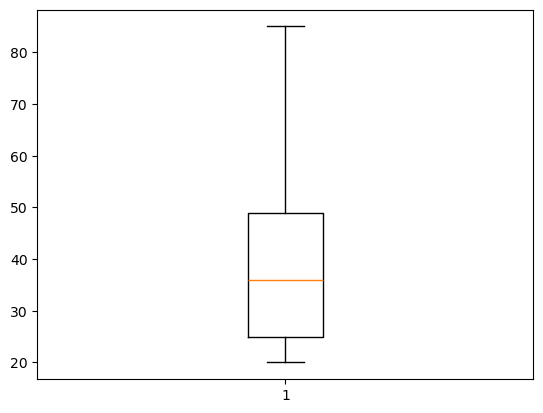

In [6]:
# Identify outliers
plt.boxplot(df['Age'])
plt.show()

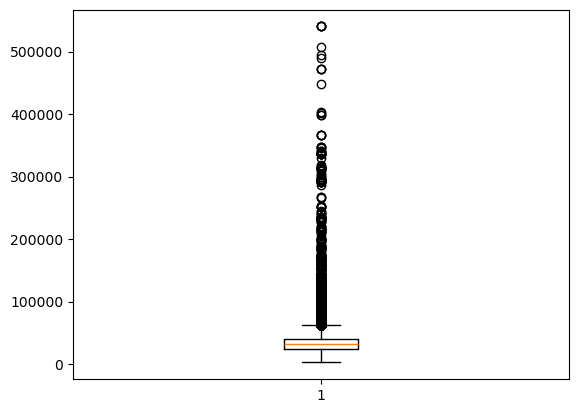

In [8]:
plt.boxplot(df['Annual_Premium'])
plt.show()

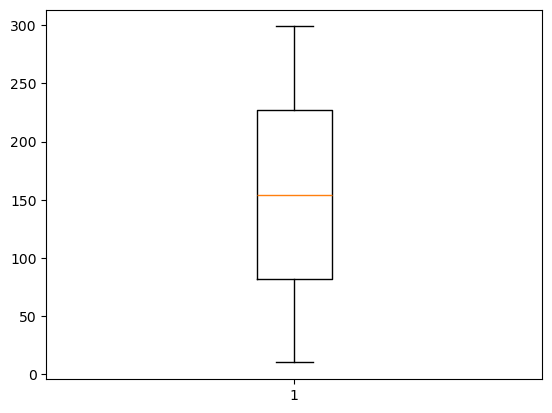

In [9]:
plt.boxplot(df['Vintage'])
plt.show()

In [66]:
# count of all region code 
df['Region_Code'].value_counts().count()

np.int64(53)

In [ ]:
# count of all policy sales channel
df['Policy_Sales_Channel'].value_counts().count()

np.int64(155)

In [7]:
# To check dataset whether it balanced or imbalanced
# But in we have imbalanced dataset with 88%(0) & 12%(1)
df['Response'].value_counts(normalize=True)

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

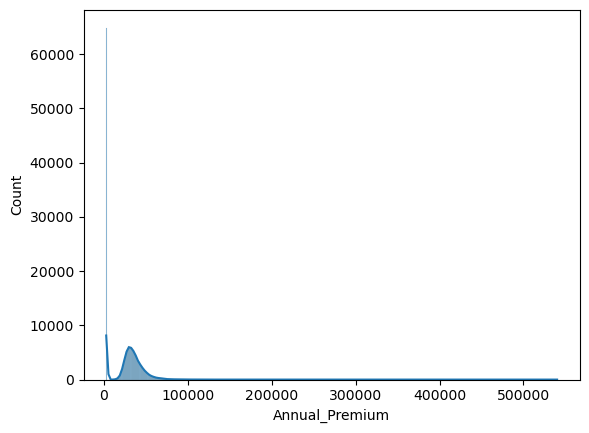

In [ ]:
# skwed data to convert into normal distribution
sns.histplot(df['Annual_Premium'], kde=True)
plt.show()

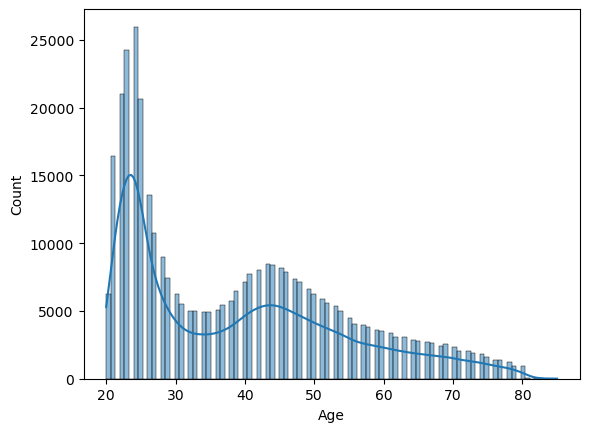

In [14]:
sns.histplot(df['Age'], kde=True)
plt.show()

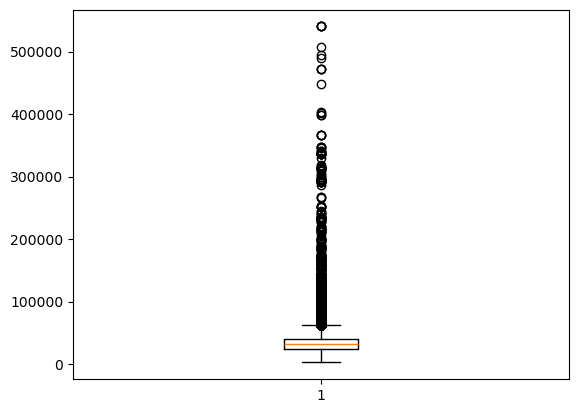

In [15]:
plt.boxplot(df['Annual_Premium'])
plt.show()

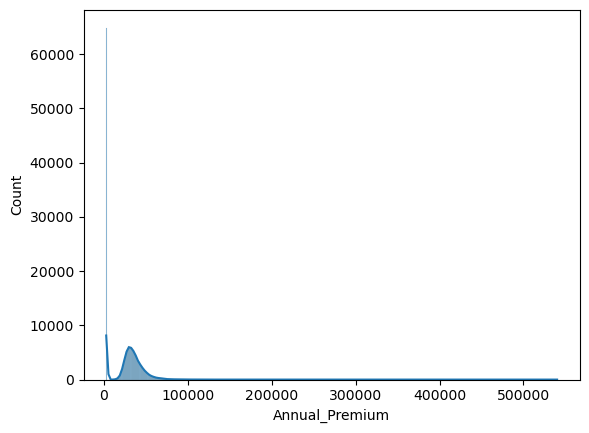

In [16]:
sns.histplot(df['Annual_Premium'], kde=True)
plt.show()

In [3]:
numeric_columns  = df.select_dtypes(include=['int64', 'float64']).columns.drop('id')

In [18]:
corr = df[numeric_columns]

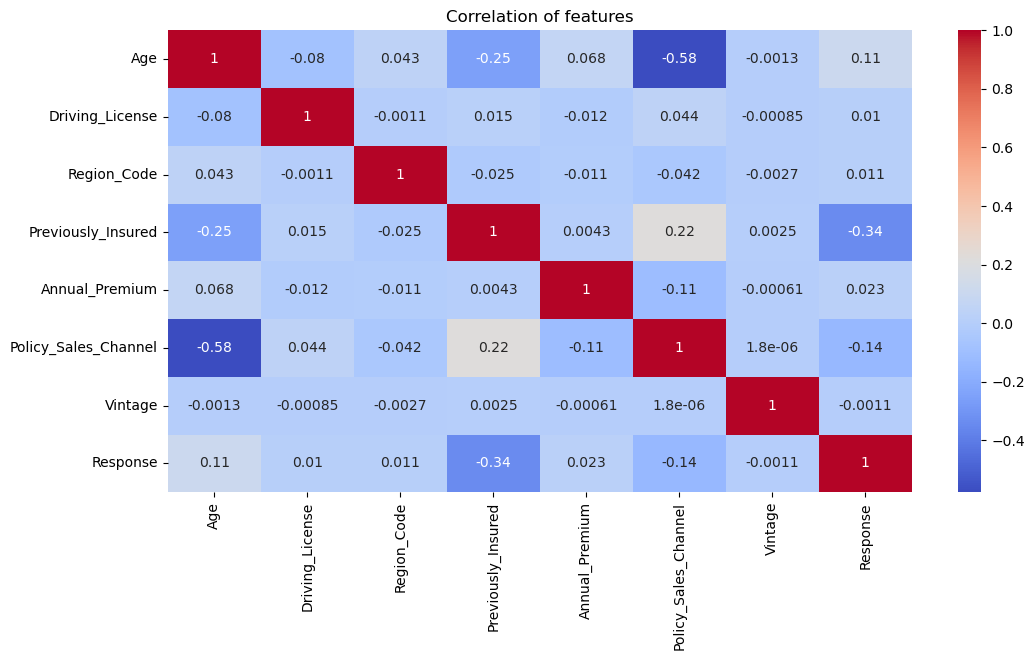

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of features")
plt.show()

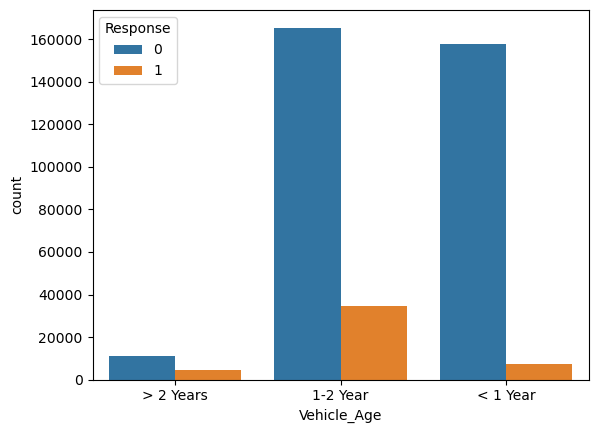

In [ ]:
sns.countplot(data=df, x='Vehicle_Age', hue='Response')
plt.show()

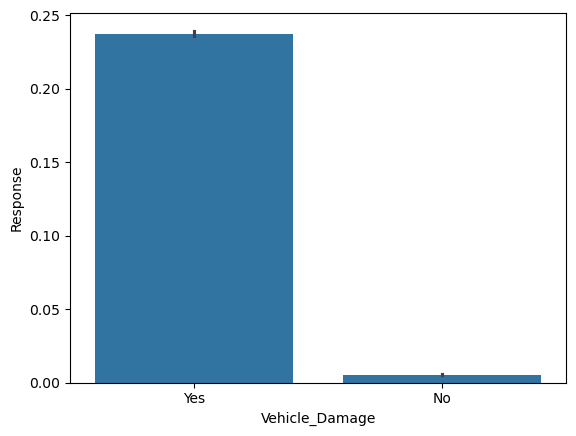

In [4]:
sns.barplot(data=df,  x='Vehicle_Damage', y='Response')
plt.show()

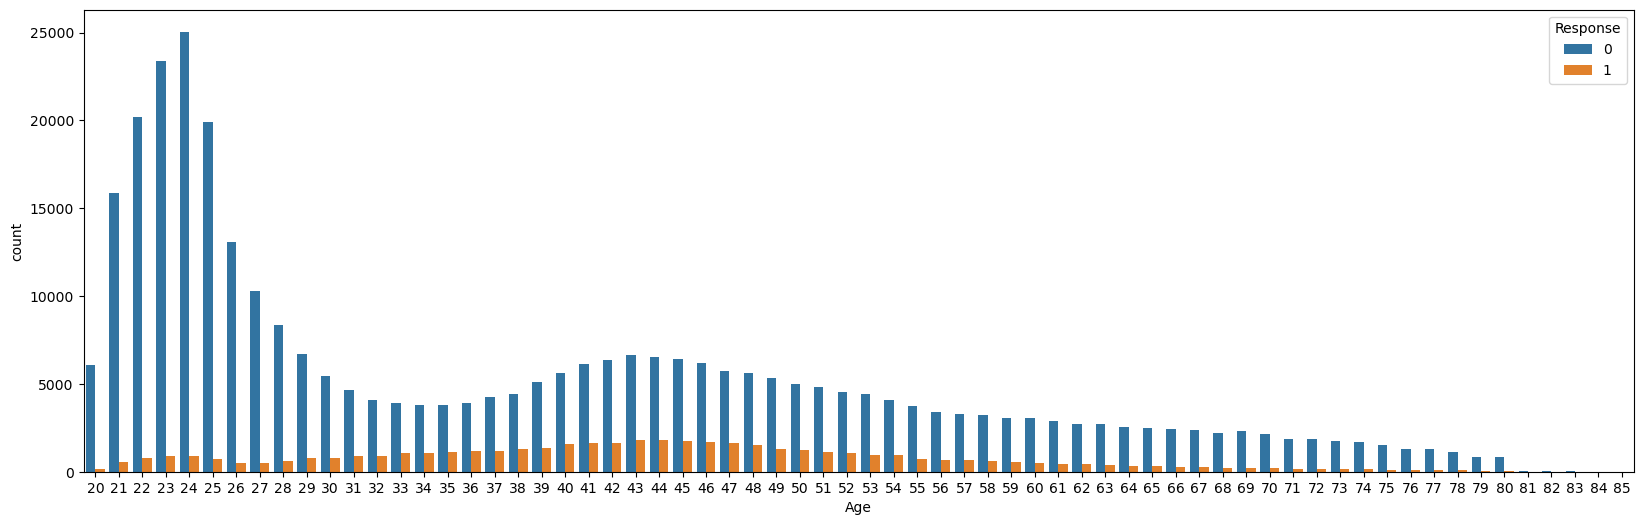

In [9]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Age', hue='Response')
plt.show()

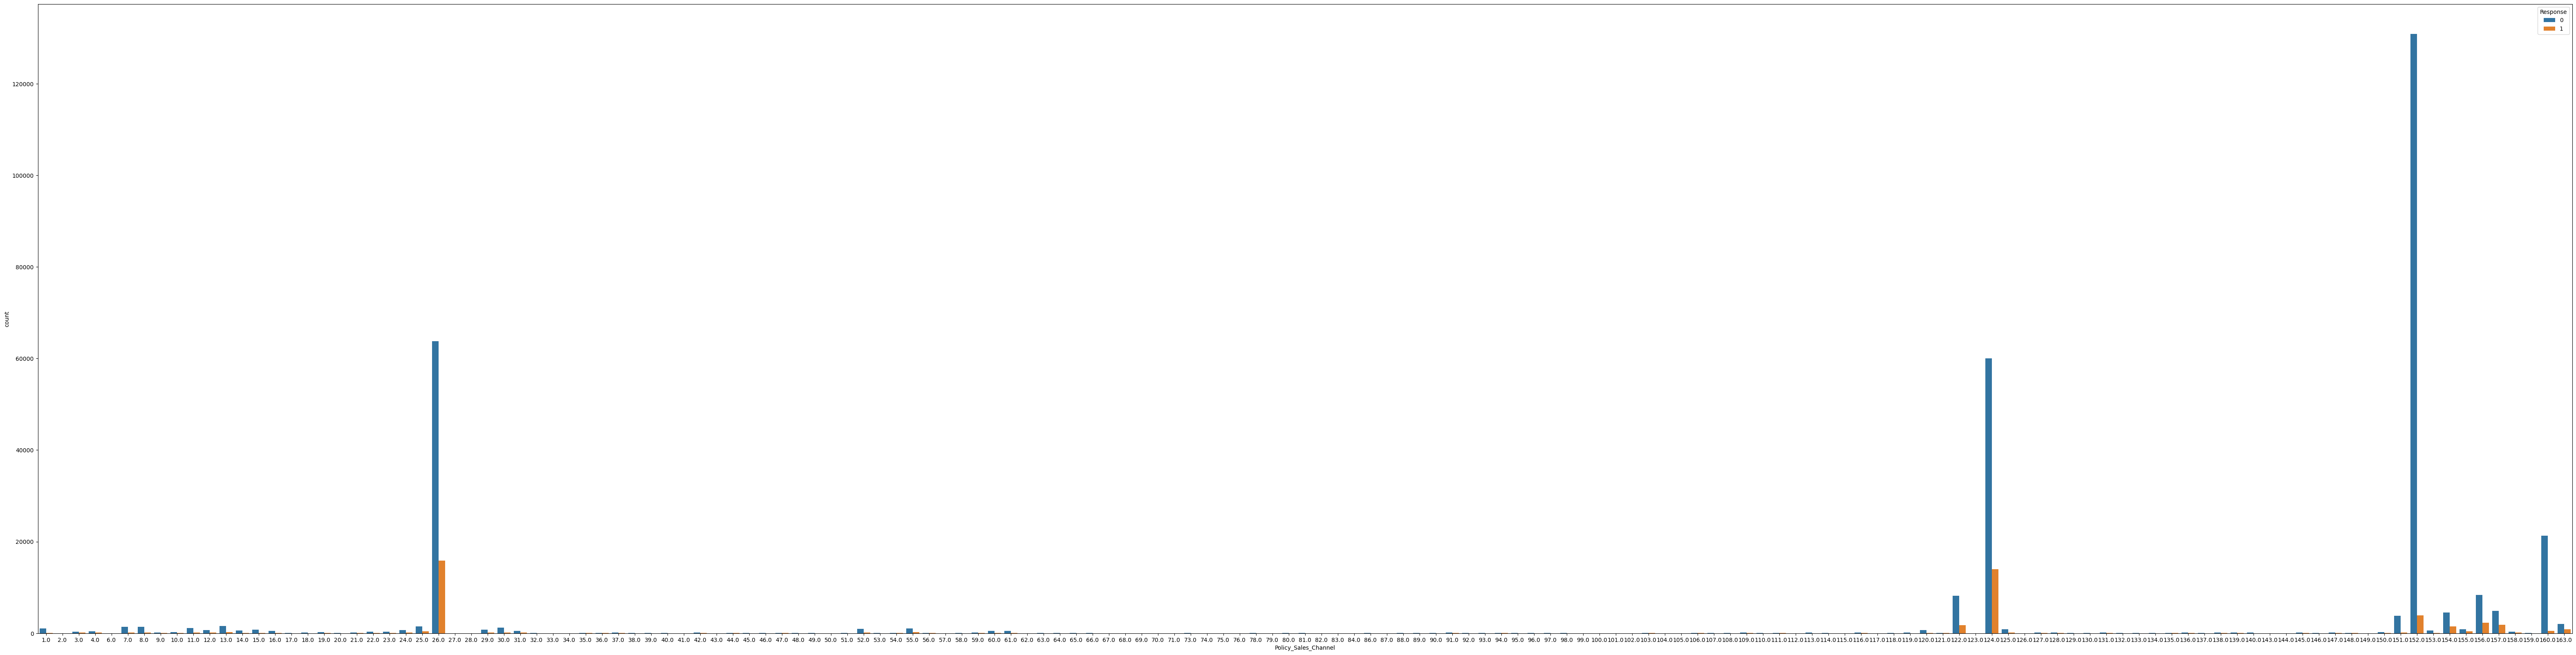

In [19]:
plt.figure(figsize=(80, 20))
sns.countplot(data=df, x='Policy_Sales_Channel', hue='Response')
plt.show()

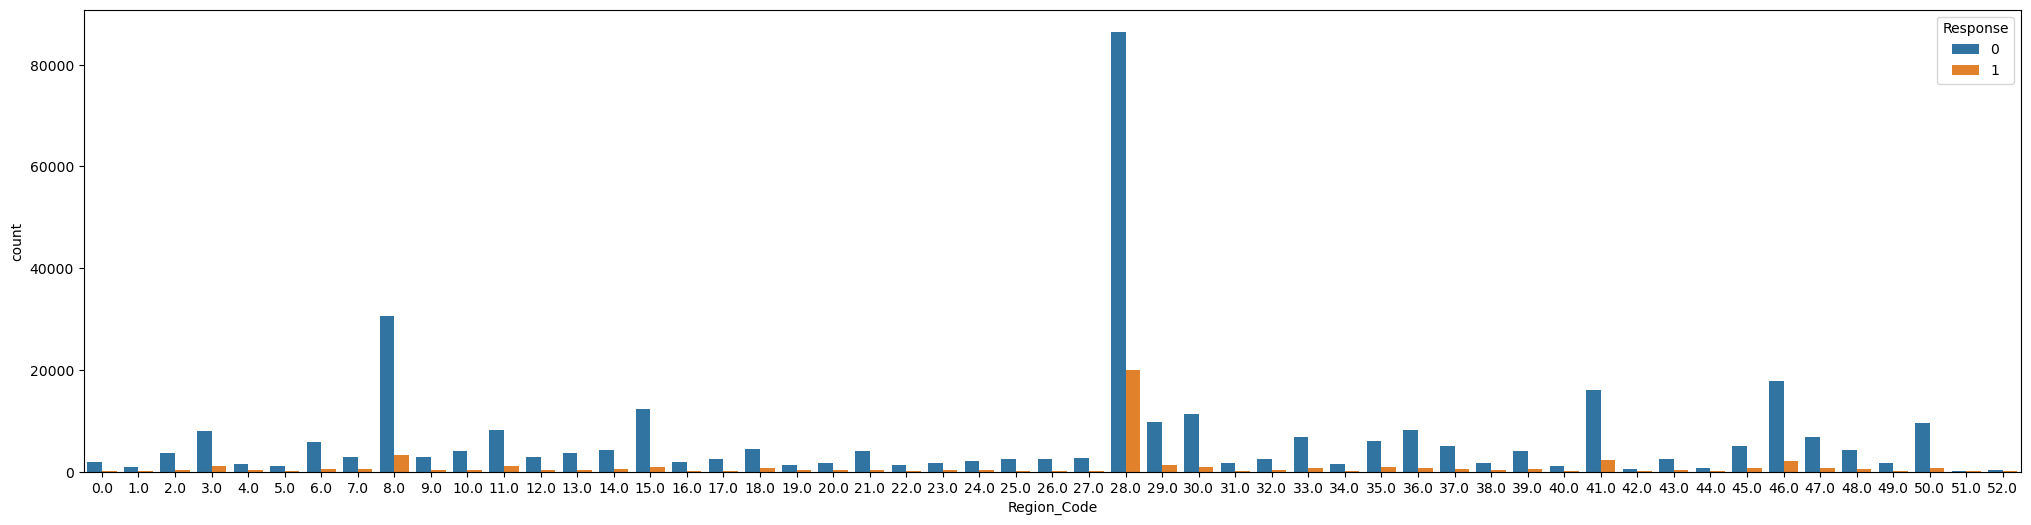

In [13]:
plt.figure(figsize=(25, 6))
sns.countplot(data=df, x='Region_Code', hue='Response')
plt.show()

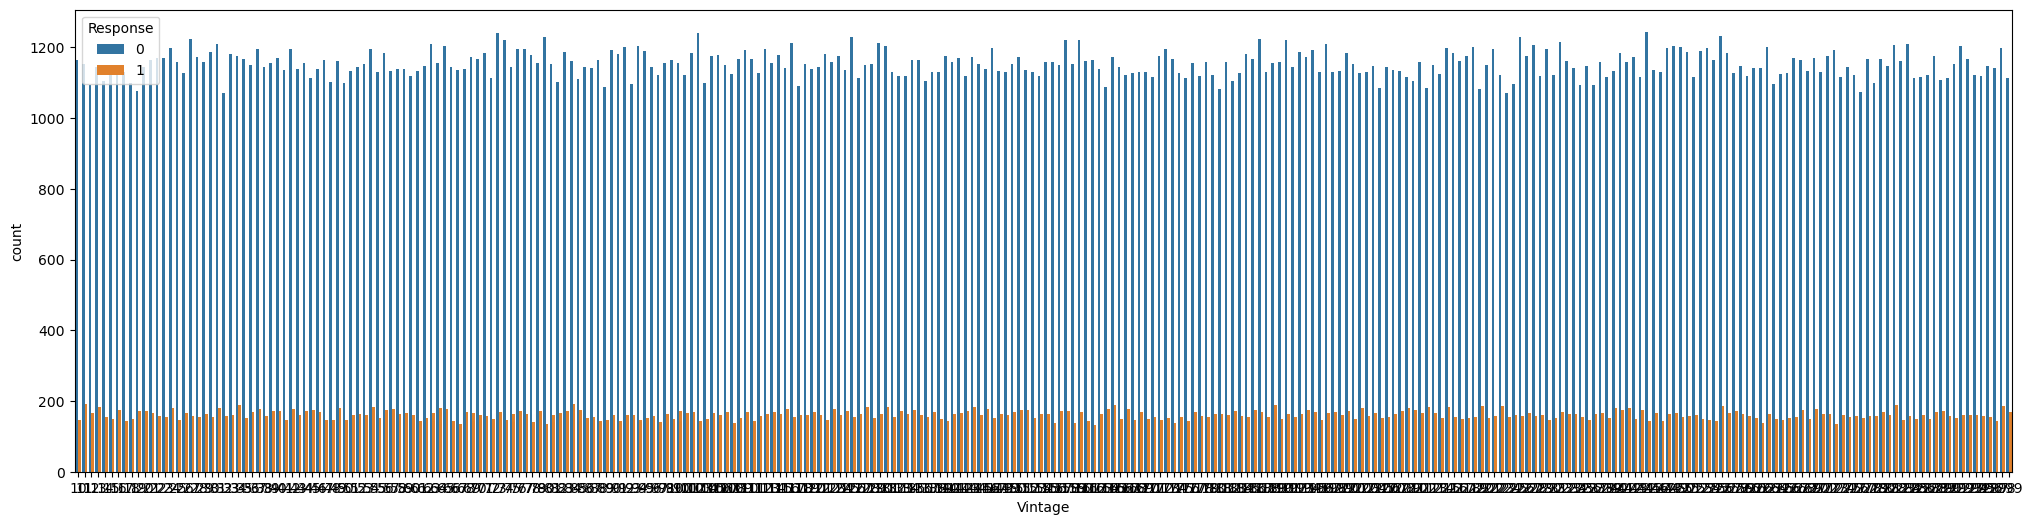

In [ ]:
plt.figure(figsize=(25, 6))
sns.countplot(data=df, x='Vintage', hue='Response')
plt.show()

In [20]:
# check all the columns present in dataset
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

5. Preprocessing 

In [7]:
# Encoding Features by Binary Encoder with 0 and 1
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'No':0, 'Yes':1})

In [8]:
# Encoding selective features to One-Hot-Encoding
df = pd.get_dummies(df, columns=['Region_Code', 'Vehicle_Age', 'Policy_Sales_Channel'], drop_first=True)

In [9]:
df.head()

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_1.0,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0
0,1,0,44,1,0,1,40454.0,217,1,False,...,False,False,False,False,False,False,False,False,False,False
1,2,0,76,1,0,0,33536.0,183,0,False,...,False,False,False,False,False,False,False,False,False,False
2,3,0,47,1,0,1,38294.0,27,1,False,...,False,False,False,False,False,False,False,False,False,False
3,4,0,21,1,1,0,28619.0,203,0,False,...,True,False,False,False,False,False,False,False,False,False
4,5,1,29,1,1,0,27496.0,39,0,False,...,True,False,False,False,False,False,False,False,False,False


In [24]:
# Did't converted boolen values to int because of Time & Space complexcity 
# With True and False it takes 0.1s and 101.8 MB
# with O & 1 it take 30+s and 631.0 MB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Columns: 217 entries, id to Policy_Sales_Channel_163.0
dtypes: bool(208), float64(1), int64(8)
memory usage: 101.8 MB


6. Data Split (Features & Labels)

In [10]:
# Split dataset into features and label
X = df.drop(columns=['id', 'Response'], axis=1)
y = df['Response']

7. Train and Test split 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)

(304887, 215)
(76222, 215)


8. Outliers capping 

In [12]:
# fix outliers with capping method 
# Only for X_train dataset which learns & apply parameters 
Q1 = X_train['Annual_Premium'].quantile(0.25)
Q3 = X_train['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
X_train['Annual_Premium'] = np.where(X_train['Annual_Premium'] < lower_bound, lower_bound, np.where(X_train['Annual_Premium'] > upper_bound, upper_bound, X_train['Annual_Premium']))

In [13]:
# Apply parameter from X_train dataset that prevents data leakage
X_test['Annual_Premium'] = np.where(X_test['Annual_Premium'] < lower_bound, lower_bound, np.where(X_test['Annual_Premium'] > upper_bound, upper_bound, X_test['Annual_Premium']))

9. Featrue Scaling 

In [29]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

10. Model Selection 

In [30]:
log_model = LogisticRegression()
log_model.fit(X_scaled_train, y_train)

LogisticRegression()

In [31]:
log_pred = log_model.predict(X_scaled_test)
print(f"Logisitc Regression Accuracy : {accuracy_score(y_test, log_pred):.2f}")
print(f"\nConfusion matrix : \n {confusion_matrix(y_test, log_pred)}")
print(f"\nClassification report : \n {classification_report(y_test, log_pred)}")

Logisitc Regression Accuracy : 0.88

Confusion matrix : 
 [[66831    49]
 [ 9316    26]]

Classification report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.35      0.00      0.01      9342

    accuracy                           0.88     76222
   macro avg       0.61      0.50      0.47     76222
weighted avg       0.81      0.88      0.82     76222



In [14]:
dec_model = DecisionTreeClassifier(random_state=42)
dec_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
dec_model.feature_importances_

array([2.69602586e-02, 1.31652331e-01, 4.20723161e-04, 1.22012449e-02,
       1.25517443e-01, 2.36763917e-01, 2.50356207e-01, 9.00736222e-04,
       1.98456092e-03, 4.92039355e-03, 1.83052451e-03, 1.03263478e-03,
       2.39135726e-03, 3.03361782e-03, 8.44668318e-03, 1.79280697e-03,
       1.88655815e-03, 3.98895807e-03, 2.13258157e-03, 2.59796974e-03,
       2.70452664e-03, 4.37716791e-03, 8.75116984e-04, 1.51958641e-03,
       3.39403236e-03, 1.68438299e-03, 1.49773210e-03, 1.82391378e-03,
       8.60120330e-04, 1.86959807e-03, 1.90426903e-03, 9.18194805e-04,
       1.43007815e-03, 1.60684437e-03, 1.26271525e-02, 4.03366498e-03,
       4.26648992e-03, 1.36218958e-03, 1.50854670e-03, 3.89186576e-03,
       1.17515827e-03, 3.54577638e-03, 4.42075534e-03, 2.24953433e-03,
       2.36540760e-03, 3.29424939e-03, 1.14125045e-03, 5.36760470e-03,
       3.46806415e-04, 2.10188448e-03, 3.55943844e-04, 3.41629510e-03,
       7.10829322e-03, 3.39511941e-03, 1.05047361e-03, 9.18170718e-04,
      

In [16]:
feature_importance = pd.DataFrame({
    'Feature' : X.columns,
    'Importance' : dec_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

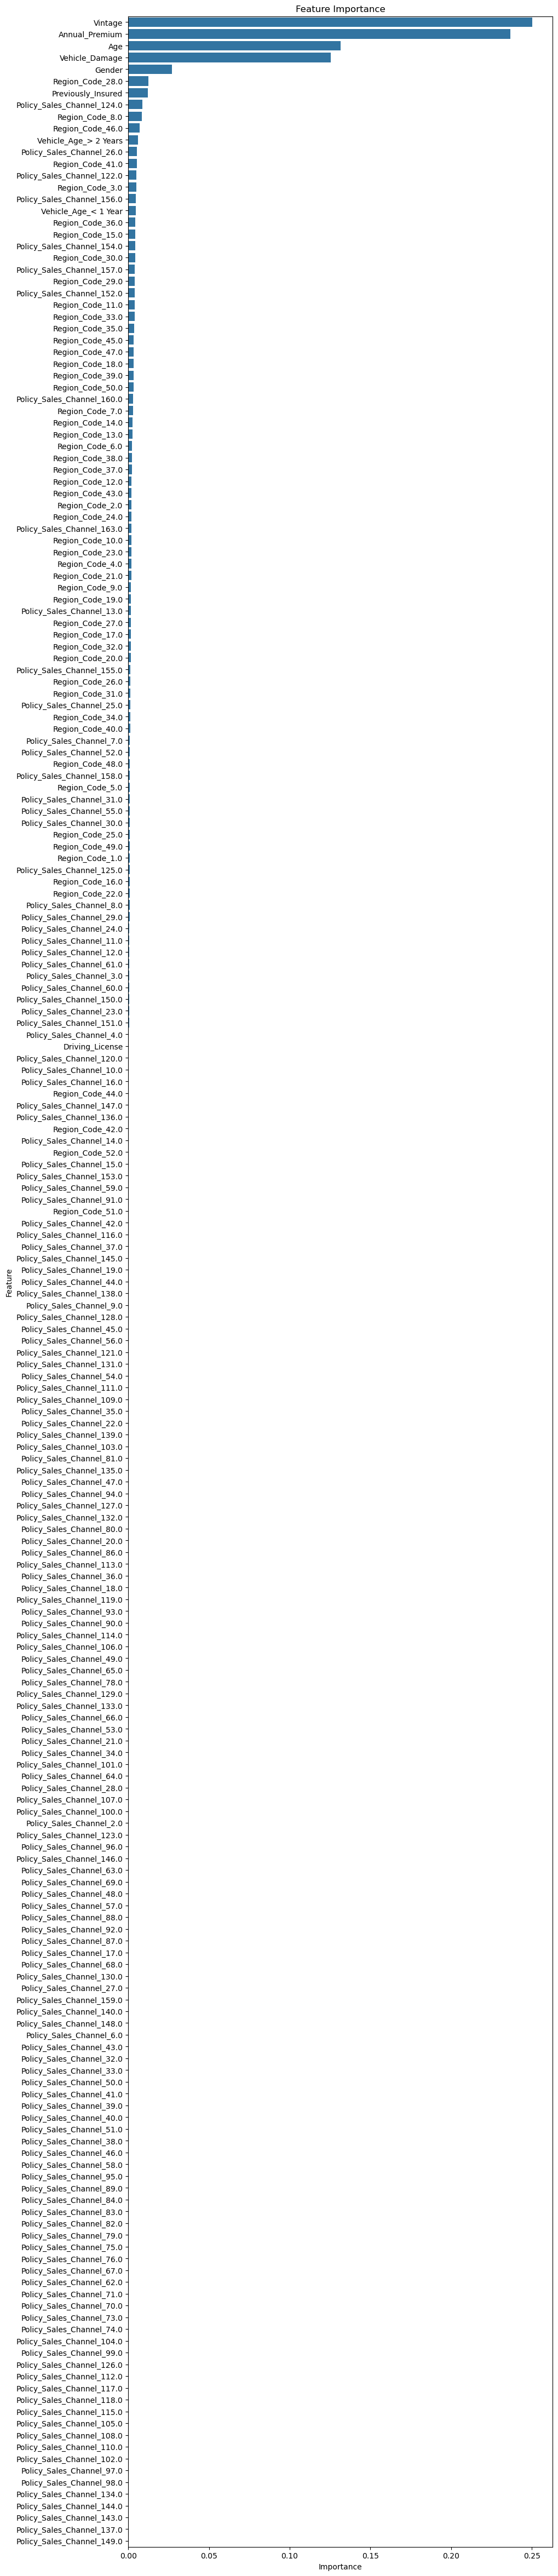

In [21]:
plt.figure(figsize=(10, 60))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

In [34]:
dec_pred = dec_model.predict(X_test)
print(f" Decision Tree Accuracy : {accuracy_score(y_test, dec_pred):.2f}")
print(f"\nConfusion matrix : \n {confusion_matrix(y_test, dec_pred)}")
print(f"\nClassification report : \n {classification_report(y_test, dec_pred)}")

 Decision Tree Accuracy : 0.83

Confusion matrix : 
 [[60197  6683]
 [ 6495  2847]]

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     66880
           1       0.30      0.30      0.30      9342

    accuracy                           0.83     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.83      0.83     76222



In [35]:
cv_score = cross_val_score(dec_model, X, y, cv=3)

In [36]:
print(f"Cross_val_score : \n {cv_score}")

Cross_val_score : 
 [0.82638916 0.82563998 0.82674203]


In [37]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5, 10], 
    'min_samples_leaf' : [1, 3]  
}

In [38]:
grid_search_dec = GridSearchCV(estimator=dec_model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search_dec.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'min_samples_leaf': [1, 3]},
             scoring='f1')

In [39]:
best_params_dec = grid_search_dec.best_params_

In [40]:

best_params_dec

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}

In [ ]:
best_dec_model = DecisionTreeClassifier(random_state=42, **best_params_dec, class_weight='balanced')
best_dec_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [42]:
best_dec_pred = best_dec_model.predict(X_test)
print(f"Decision Tree Accuracy : {accuracy_score(y_test, best_dec_pred):.2f}")
print(f"\nConfusion matrix : \n {confusion_matrix(y_test, best_dec_pred)}")
print(f"\nClassification report : \n {classification_report(y_test, best_dec_pred)}")

Decision Tree Accuracy : 0.70

Confusion matrix : 
 [[45077 21803]
 [  754  8588]]

Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.67      0.80     66880
           1       0.28      0.92      0.43      9342

    accuracy                           0.70     76222
   macro avg       0.63      0.80      0.62     76222
weighted avg       0.90      0.70      0.75     76222



In [22]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
rf_pred = rf_model.predict(X_test)
print(f"Random Forest Accuracy : {accuracy_score(y_test, rf_pred):.2f}")
print(f"\nConfusion matrix : \n {confusion_matrix(y_test, rf_pred)}")
print(f"\nClassification report : \n {classification_report(y_test, rf_pred)}")

Random Forest Accuracy : 0.86

Confusion matrix : 
 [[64449  2431]
 [ 7981  1361]]

Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.96      0.93     66880
           1       0.36      0.15      0.21      9342

    accuracy                           0.86     76222
   macro avg       0.62      0.55      0.57     76222
weighted avg       0.82      0.86      0.84     76222



In [24]:
# Did not take criterion cause of slowness, entropy is slower than gini 
# Now i have (2*2*2) = 8 models to evaluate and choose best hyper-parameter   
param_grid_rf = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [100, 200],
    'max_depth' : [5, 10], 
    'min_samples_leaf' : [1, 3]     
}

In [25]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'min_samples_leaf': [1, 3],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [27]:
best_params_rf = grid_search_rf.best_params_

In [28]:
best_params_rf

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [29]:
best_rf_model = RandomForestClassifier(random_state=42, **best_params_rf, class_weight='balanced')
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [30]:
rf_feature_importance = pd.DataFrame({
    'Feature' : X.columns,
    'Importance' : best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

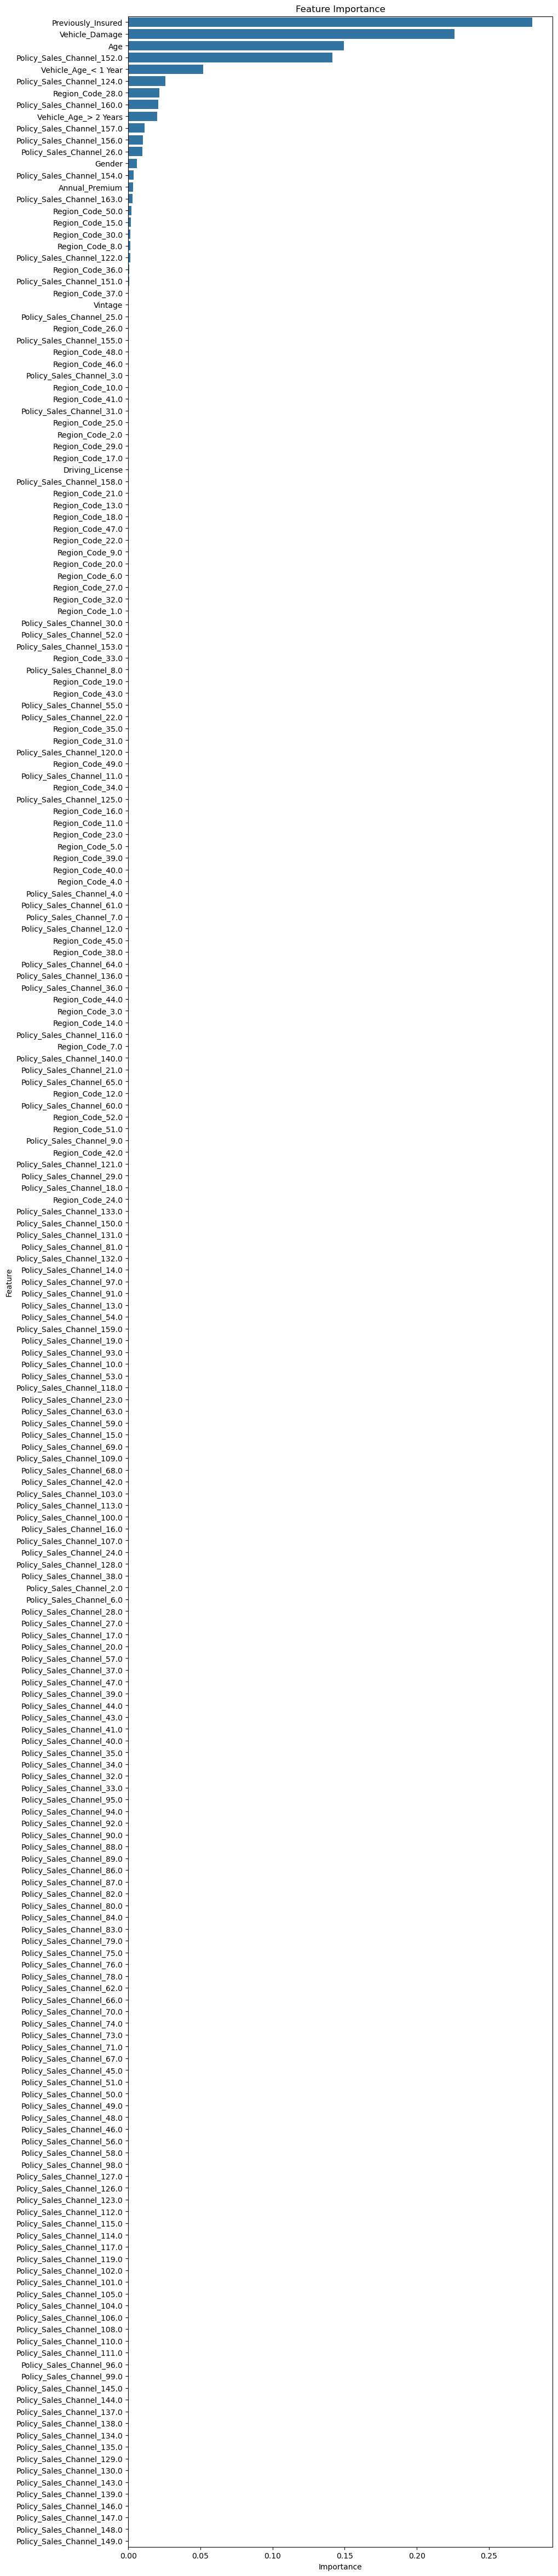

In [31]:
plt.figure(figsize=(10, 60))
sns.barplot(data=rf_feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

In [32]:
best_rf_pred = best_rf_model.predict(X_test)
print(f"Random Forest Accuracy : {accuracy_score(y_test, best_rf_pred):.2f}")
print(f"\nConfusion matrix : \n {confusion_matrix(y_test, best_rf_pred)}")
print(f"\nClassification report : \n {classification_report(y_test, best_rf_pred)}")

Random Forest Accuracy : 0.71

Confusion matrix : 
 [[45330 21550]
 [  866  8476]]

Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.68      0.80     66880
           1       0.28      0.91      0.43      9342

    accuracy                           0.71     76222
   macro avg       0.63      0.79      0.62     76222
weighted avg       0.90      0.71      0.76     76222



In [51]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [52]:
gb_pred = gb_model.predict(X_test)
print(f"Gradient Boost Accuracy : {accuracy_score(y_test, gb_pred):.2f}")
print(f"\nConfusion matrix : \n {confusion_matrix(y_test, gb_pred)}")
print(f"\nClassification report : \n {classification_report(y_test, gb_pred)}")

Gradient Boost Accuracy : 0.88

Confusion matrix : 
 [[66878     2]
 [ 9341     1]]

Classification report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.33      0.00      0.00      9342

    accuracy                           0.88     76222
   macro avg       0.61      0.50      0.47     76222
weighted avg       0.81      0.88      0.82     76222



In [53]:
X_train.columns = (
    X_train.columns
    .str.replace('[', '', regex=False)
    .str.replace(']', '', regex=False)
    .str.replace('<', 'lt_', regex=False)
    .str.replace('>', 'gt_', regex=False)
    .str.replace(' ', '_')
)
X_test.columns = X_train.columns

In [54]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [55]:
xgb_pred = xgb_model.predict(X_test)
print(f"XGBoost Accuracy : {accuracy_score(y_test, xgb_pred):.2f}")
print(f"\nConfusion matrix : \n {confusion_matrix(y_test, xgb_pred)}")
print(f"\nClassification report : \n {classification_report(y_test, xgb_pred)}")

XGBoost Accuracy : 0.88

Confusion matrix : 
 [[66658   222]
 [ 9168   174]]

Classification report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.44      0.02      0.04      9342

    accuracy                           0.88     76222
   macro avg       0.66      0.51      0.48     76222
weighted avg       0.83      0.88      0.82     76222



In [56]:
param_grid_xgb = {
    'n_estimators' : [100, 200],
    'max_depth' : [3, 5, 7]
}

In [ ]:
# n_jobs=-1 that uses all cores of CPU (fast) & n_job=1 that uses 1 core (slow)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='roc_auc')

In [58]:
best_params_xgb = grid_search_xgb.best_params_

In [59]:
best_xgb_model = XGBClassifier(random_state=42, **best_params_xgb)
best_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [60]:
best_xgb_pred = best_xgb_model.predict(X_test)
print(f"XGBoost Accuracy : {accuracy_score(y_test, best_xgb_pred):.2f}")
print(f"\nConfusion matrix : \n {confusion_matrix(y_test, best_xgb_pred)}")
print(f"\nClassification report : \n {classification_report(y_test, best_xgb_pred)}")

XGBoost Accuracy : 0.88

Confusion matrix : 
 [[66797    83]
 [ 9266    76]]

Classification report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.48      0.01      0.02      9342

    accuracy                           0.88     76222
   macro avg       0.68      0.50      0.48     76222
weighted avg       0.83      0.88      0.82     76222



11. Model Evaluation

**Observation**

Logistic Regression 
accuracy = 88
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.33      0.00      0.01      9342

Decision Tree 
accuracy = 83
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     66880
           1       0.30      0.31      0.31      9342

Tuned Decision Tree
accuracy = 70
               precision    recall  f1-score   support

           0       0.98      0.67      0.80     66880
           1       0.28      0.92      0.43      9342

Random Forest 
accuracy = 86
               precision    recall  f1-score   support

           0       0.89      0.96      0.93     66880
           1       0.36      0.14      0.21      9342

Tuned Random Forest 
accuracy = 71
               precision    recall  f1-score   support

           0       0.98      0.68      0.80     66880
           1       0.28      0.91      0.43      9342

**Conclusion** : Among the all selective algorithm, Random forest performs better but still struggle with postive (response 1).Accuracy of 0.71 indicates 71%, Accuracy alone can mislead. 